In [1]:
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np

# Erdos Renyi

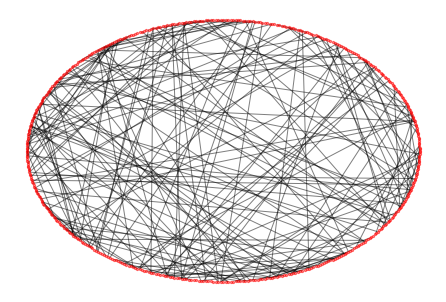

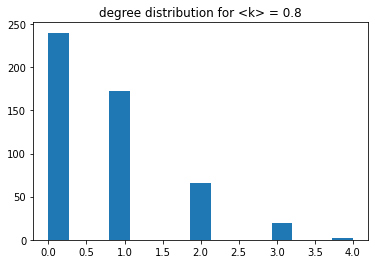

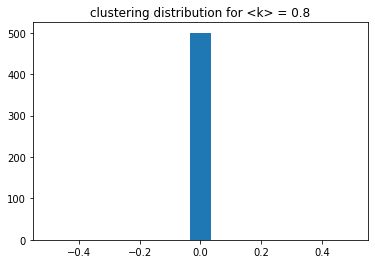

0.74
0.0


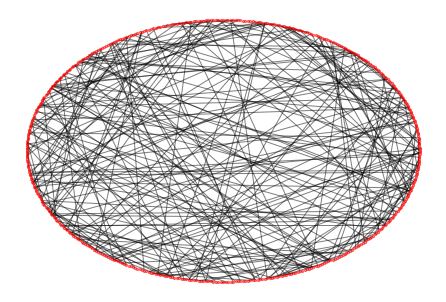

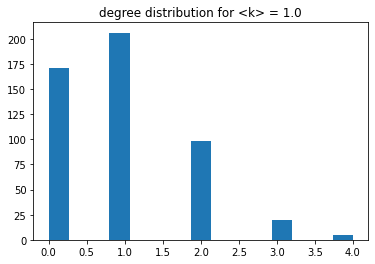

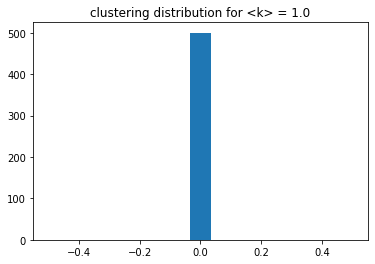

0.964
0.0


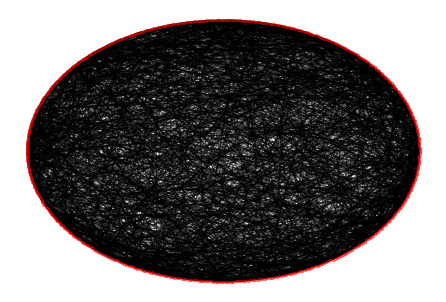

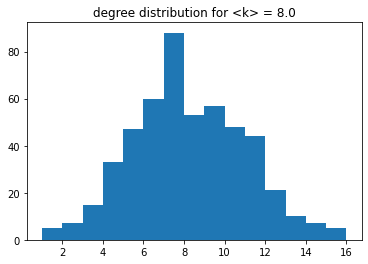

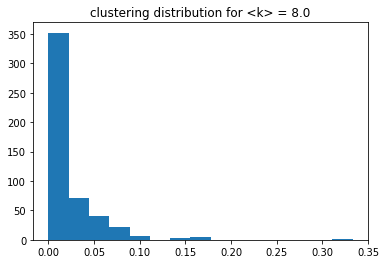

7.728
0.016291369741369743


In [83]:
N = 500
k = 0.8

def gen_erdos(N, k):
    G = nx.erdos_renyi_graph(N, k / N)

    options = {
        "node_color": "red",
        'node_size': 5,
    }
    nx.draw(G, pos=nx.circular_layout(G), alpha=0.5, **options)
    plt.savefig('p1_' + str(int(k)) + 'graph.jpg')
    plt.show()

    g_degrees = np.zeros(N)
    g_clustering = np.zeros(N)
    d_degree = G.degree
    d_clustering = nx.clustering(G)
    for i in range(N):
        g_degrees[i] = d_degree[i]
        g_clustering[i] = d_clustering[i]

    plt.hist(g_degrees, bins=15)
    plt.title('degree distribution for <k> = ' + str(k))
    plt.savefig('p1_'+str(int(k))+'deg.jpg', bbox_inches='tight')
    plt.show()
    plt.hist(g_clustering, bins=15)
    plt.title('clustering distribution for <k> = ' + str(k))
    plt.savefig('p1_'+str(int(k))+'clust.jpg', bbox_inches='tight')
    plt.show()
    print(np.mean(g_degrees))
    print(np.mean(g_clustering))

gen_erdos(500, 0.8)
gen_erdos(500, 1.0)
gen_erdos(500, 8.0)

# Metropolis

In [ ]:
def gen_gaus():
    step = 0.1

    def target_dist(x):
        sigma = 1
        return np.exp(- x ** 2 / (2 * sigma ** 2))


    # Initialize at x=0
    x = 0
    # Random choice of y with step
    for i in range(10000):
        y = x + step * np.random.uniform(-1, 1)
        p = min(1, target_dist(y) / target_dist(x))
        # metropolis decision
        if np.random.uniform(0, 1) < p:
            x = y
    return x

n = 100
data = np.zeros(n)
for i in range(n):
#     print(i)
    data[i] = gen_gaus()

plt.hist(data, bins=15)

# Monte Carlo ERF(x) from 0 to 2

In [2]:
from time import time

In [82]:
def f(x):
    return np.exp(- x ** 2)

# SS MC with stat error
def SSMC(n):
    start = time()
    mean_f = 0
    mean_f2 = 0
    for i in range(n):
        rand = np.random.uniform(0, 2)
        mean_f += f(rand)
        mean_f2 += f(rand) ** 2

    mean_f2 /= n
    mean_f /= n
    elapsed = time() - start
    err = np.sqrt(mean_f2 - mean_f ** 2 / n)
    result = mean_f * 2

    print("I = %.6f" % result)
    print("stat delta I = %.6f" % err)
    print("real delta I = %.6f" % (result - 0.8820814))
    print("runtime = %.5f" % elapsed)

SSMC(64000)

I = 0.879419
stat delta I = 0.558204
real delta I = -0.002662
runtime = 0.33243


In [60]:
# IS MC
def ISMC(n):
    def f(x):
        return np.exp(- x ** 2)

    def g(x):
        return np.exp(-x)
    start = time()
    # The integral for the result
    INT_G = 1 - np.exp(-2)
    range2 = np.exp(-2)
    # random generator with g(x) prob. dist.
    def g_rand(a, b):
        return - np.log(np.random.uniform(a, b))
    # Initialize 
    mean_fog = 0
    mean_fog2 = 0

    for i in range(n):
        rand = g_rand(range2, 1)
        mean_fog += f(rand) / g(rand)
        mean_fog2 += (f(rand) / g(rand)) ** 2

    mean_fog /= n
    mean_fog2 /= n

    result = INT_G * mean_fog
    err = np.sqrt((mean_fog2 - mean_fog ** 2) / n)
    elapsed = time() - start
    # Report
    print("I = %.6f" % result)
    print("stat delta I = %.6f" % err)
    print("real delta I = %.6f" % (result - 0.8820814))
    print("runtime = %.5f" %elapsed)
    
ISMC(1000)

I = 0.888548
stat delta I = 0.009674
real delta I = 0.006467
runtime = 0.03523
